# CS-549 Assignment 3 - Linear Regression

In [14]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
import math
warnings.filterwarnings('ignore')
%matplotlib inline

# Data
We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

Avg. Session Length: Average session of in-store style advice sessions.
Time on App: Average time spent on App in minutes
Time on Website: Average time spent on Website in minutes
Length of Membership: How many years the customer has been a member.
Read in the Ecommerce Customers csv file as a DataFrame called customers

# Task 1
1. Read the data into a dataframe(df) titled customers
2. Print the information regarding the columns in the df such as their data type, non-null counts etc.
3. Print the first few rows of the df.

In [15]:
customers = pd.read_csv('./Ecomm-Customers.csv')

In [16]:
emails = customers['Email']
addresses = customers['Address']
avatars = customers['Avatar']
avgs = customers['Avg. Session Length']
timesapp = customers['Time on App']
timesweb = customers['Time on Website']
lengths = customers['Length of Membership']
yearlys = customers['Yearly Amount Spent']
df = pd.DataFrame({"Email": emails, "Address": addresses,
                   "Avatar": avatars, "Avg. Session Length": avgs, 
                   "Time on App": timesapp, "Time on Website": timesweb, 
                   "Length of Membership": lengths, "Yearly Amount Spent": yearlys
                  })

In [17]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


# Task 2
Use the sns library which has been imported in the first cell and implement two functions
1. Find the correlation between all the columns in customers in terms of scatter-plots.
2. Find the correlation between all the columns in customers using heat maps.

<Figure size 432x288 with 0 Axes>

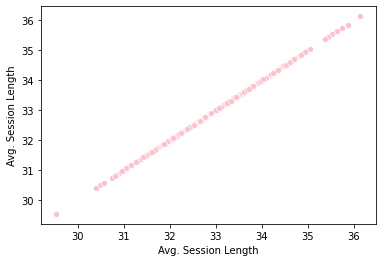

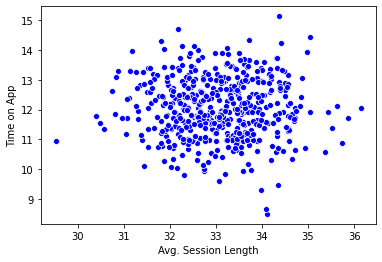

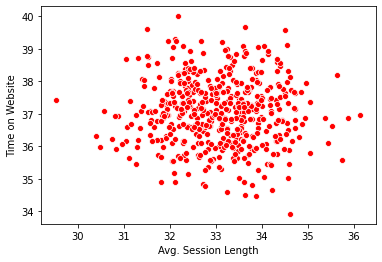

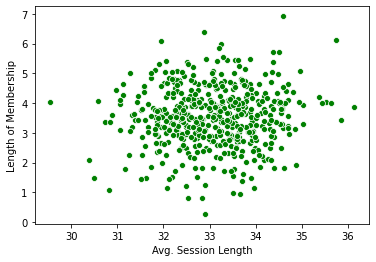

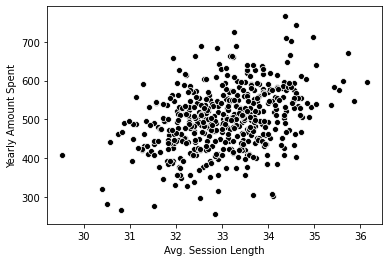

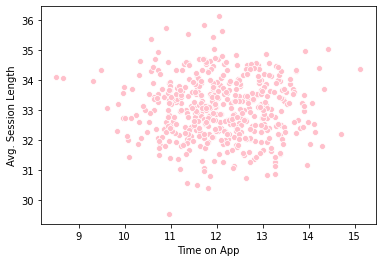

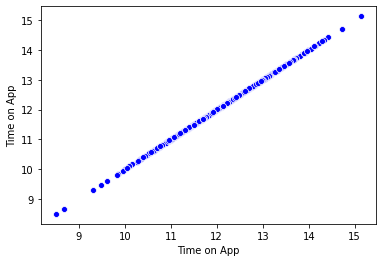

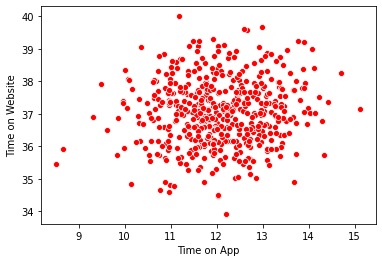

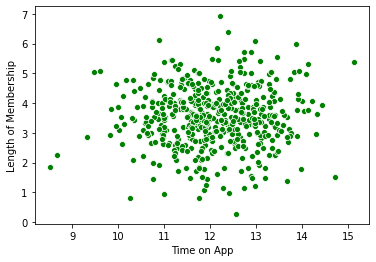

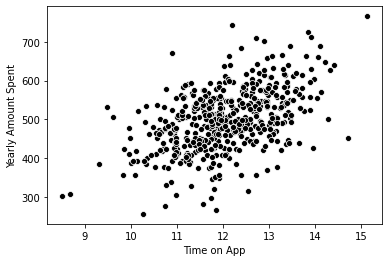

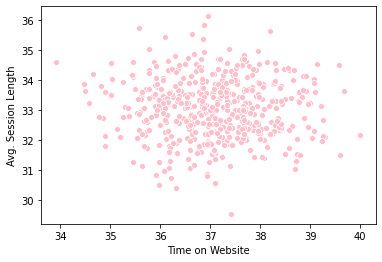

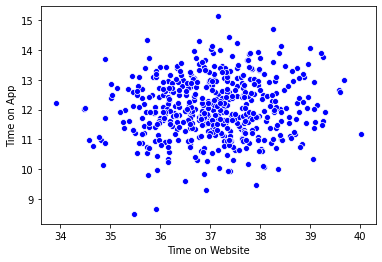

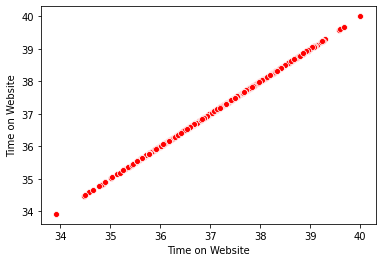

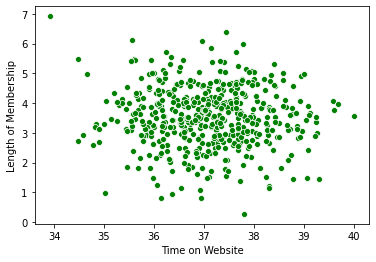

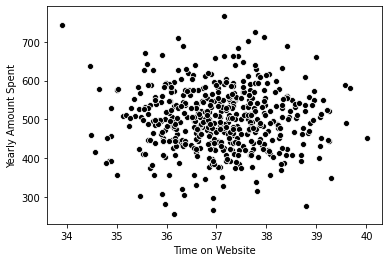

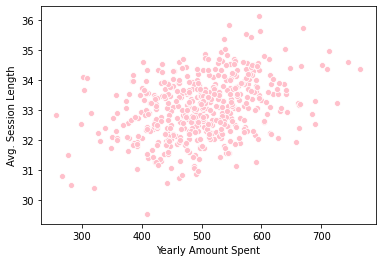

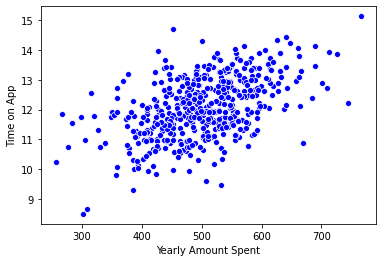

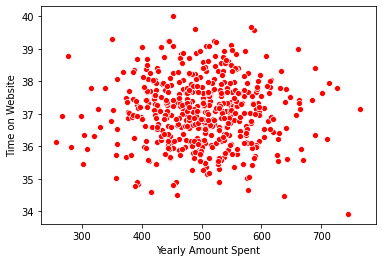

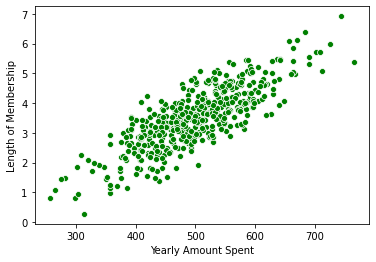

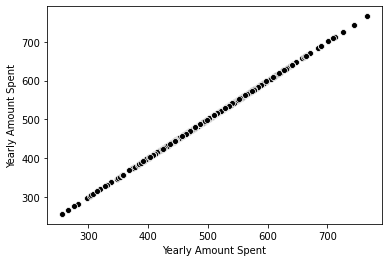

<Figure size 432x288 with 0 Axes>

In [18]:
sns.scatterplot(avgs, avgs, color='pink')
plt.figure()
sns.scatterplot(avgs, timesapp, color='blue')
plt.figure()
sns.scatterplot(avgs, timesweb, color='red')
plt.figure()
sns.scatterplot(avgs, lengths, color='green')
plt.figure()
sns.scatterplot(avgs, yearlys, color='black')
plt.figure()
sns.scatterplot(timesapp, avgs, color='pink')
plt.figure()
sns.scatterplot(timesapp, timesapp, color='blue')
plt.figure()
sns.scatterplot(timesapp, timesweb, color='red')
plt.figure()
sns.scatterplot(timesapp, lengths, color='green')
plt.figure()
sns.scatterplot(timesapp, yearlys, color='black')
plt.figure()
sns.scatterplot(timesweb, avgs, color='pink')
plt.figure()
sns.scatterplot(timesweb, timesapp, color='blue')
plt.figure()
sns.scatterplot(timesweb, timesweb, color='red')
plt.figure()
sns.scatterplot(timesweb, lengths, color='green')
plt.figure()
sns.scatterplot(timesweb, yearlys, color='black')
plt.figure()
sns.scatterplot(yearlys, avgs, color='pink')
plt.figure()
sns.scatterplot(yearlys, timesapp, color='blue')
plt.figure()
sns.scatterplot(yearlys, timesweb, color='red')
plt.figure()
sns.scatterplot(yearlys, lengths, color='green')
plt.figure()
sns.scatterplot(yearlys, yearlys, color='black')
plt.figure()


From the plots, we should see that data distribution is quite normal, and that there is a clear correlation between length of membership and yearly amount spent.

<Figure size 432x288 with 0 Axes>

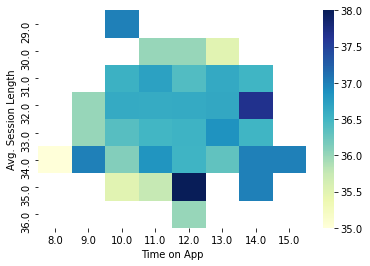

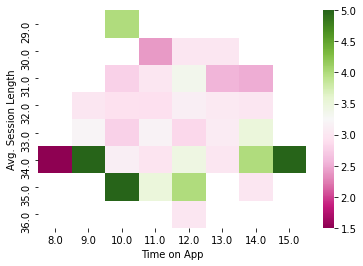

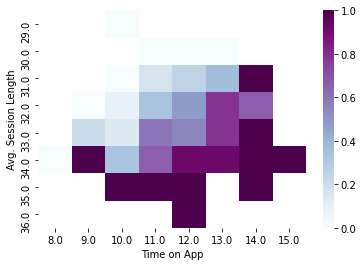

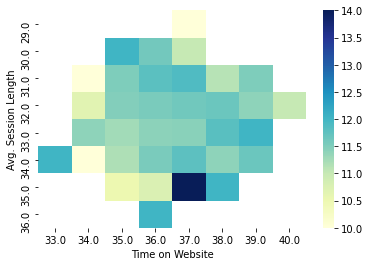

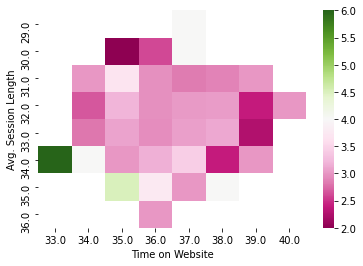

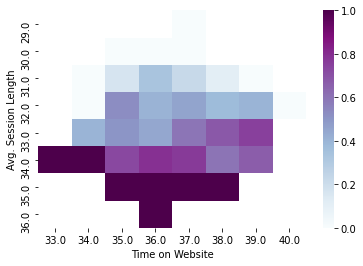

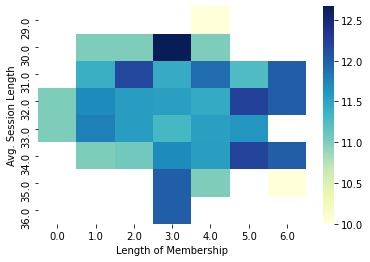

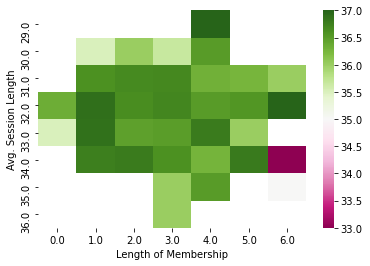

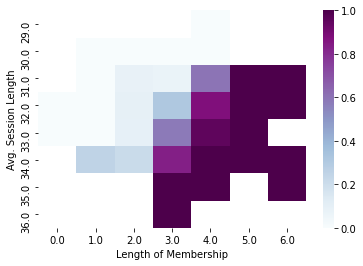

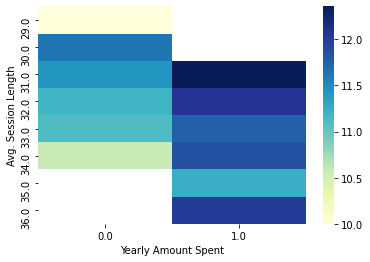

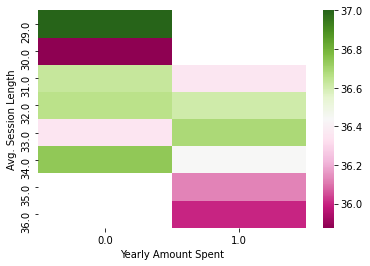

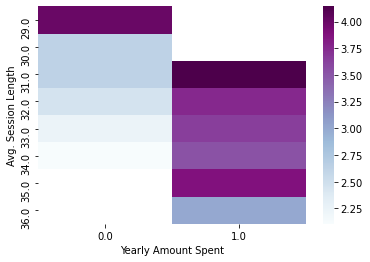

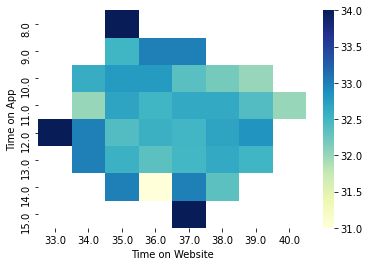

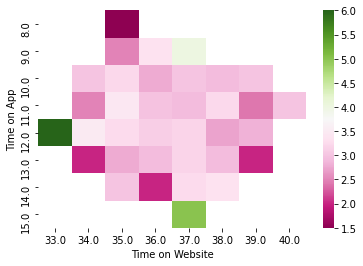

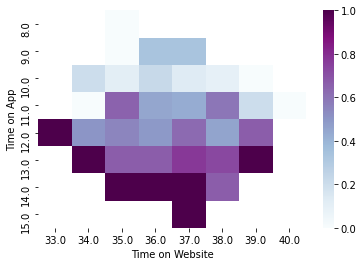

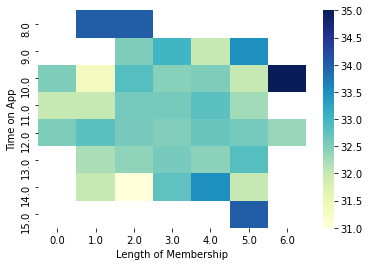

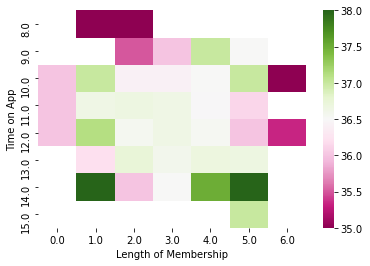

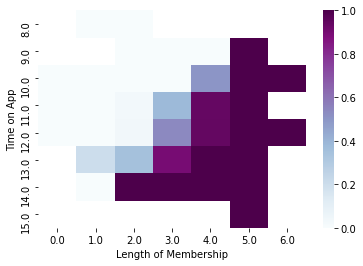

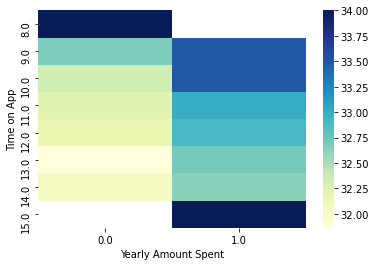

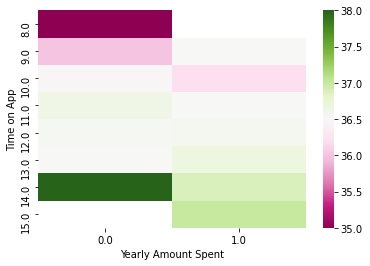

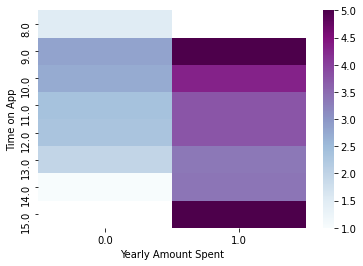

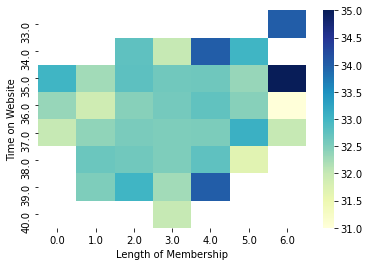

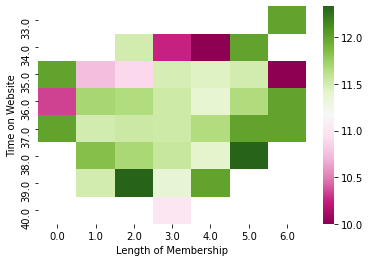

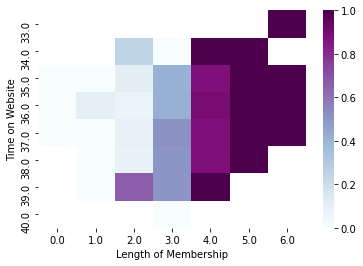

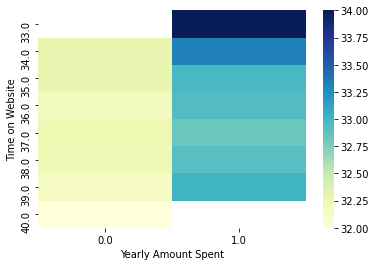

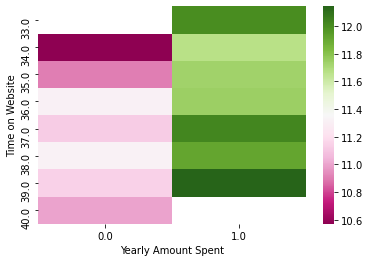

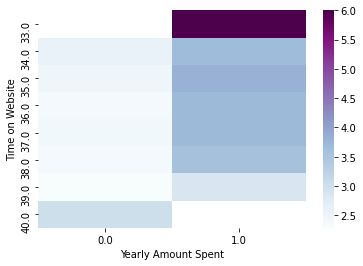

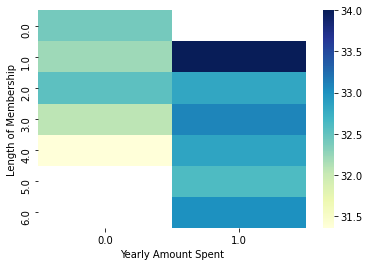

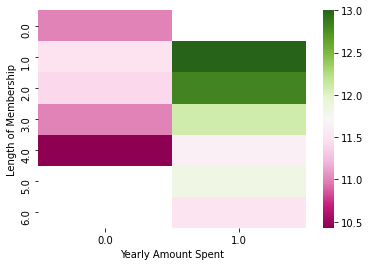

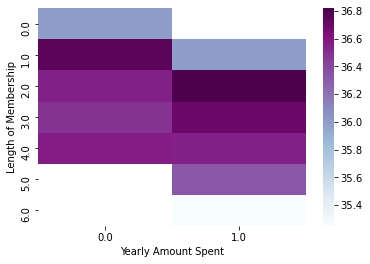

<Figure size 432x288 with 0 Axes>

In [19]:
customers2 = customers.copy()
cols = customers.columns
for col in cols[3:]:
    customers2[col] = customers[col].apply(np.floor)
customers2['Yearly Amount Spent'] = (customers['Yearly Amount Spent']/500).apply(np.floor)

heatmap1_data = pd.pivot_table(customers2, values='Time on Website', 
                     index=['Avg. Session Length'], 
                     columns='Time on App')
sns.heatmap(heatmap1_data, cmap="YlGnBu")
plt.figure()
heatmap1_data = pd.pivot_table(customers2, values='Length of Membership', 
                     index=['Avg. Session Length'], 
                     columns='Time on App')
sns.heatmap(heatmap1_data, cmap="PiYG")
plt.figure()
heatmap1_data = pd.pivot_table(customers2, values='Yearly Amount Spent', 
                     index=['Avg. Session Length'], 
                     columns='Time on App')
sns.heatmap(heatmap1_data, cmap="BuPu")
plt.figure()

heatmap1_data = pd.pivot_table(customers2, values='Time on App', 
                     index=['Avg. Session Length'], 
                     columns='Time on Website')
sns.heatmap(heatmap1_data, cmap="YlGnBu")
plt.figure()
heatmap1_data = pd.pivot_table(customers2, values='Length of Membership', 
                     index=['Avg. Session Length'], 
                     columns='Time on Website')
sns.heatmap(heatmap1_data, cmap="PiYG")
plt.figure()
heatmap1_data = pd.pivot_table(customers2, values='Yearly Amount Spent', 
                     index=['Avg. Session Length'], 
                     columns='Time on Website')
sns.heatmap(heatmap1_data, cmap="BuPu")
plt.figure()

heatmap1_data = pd.pivot_table(customers2, values='Time on App', 
                     index=['Avg. Session Length'], 
                     columns='Length of Membership')
sns.heatmap(heatmap1_data, cmap="YlGnBu")
plt.figure()
heatmap1_data = pd.pivot_table(customers2, values='Time on Website', 
                     index=['Avg. Session Length'], 
                     columns='Length of Membership')
sns.heatmap(heatmap1_data, cmap="PiYG")
plt.figure()
heatmap1_data = pd.pivot_table(customers2, values='Yearly Amount Spent', 
                     index=['Avg. Session Length'], 
                     columns='Length of Membership')
sns.heatmap(heatmap1_data, cmap="BuPu")
plt.figure()

heatmap1_data = pd.pivot_table(customers2, values='Time on App', 
                     index=['Avg. Session Length'], 
                     columns='Yearly Amount Spent')
sns.heatmap(heatmap1_data, cmap="YlGnBu")
plt.figure()
heatmap1_data = pd.pivot_table(customers2, values='Time on Website', 
                     index=['Avg. Session Length'], 
                     columns='Yearly Amount Spent')
sns.heatmap(heatmap1_data, cmap="PiYG")
plt.figure()
heatmap1_data = pd.pivot_table(customers2, values='Length of Membership', 
                     index=['Avg. Session Length'], 
                     columns='Yearly Amount Spent')
sns.heatmap(heatmap1_data, cmap="BuPu")
plt.figure()

heatmap1_data = pd.pivot_table(customers2, values='Avg. Session Length', 
                     index=['Time on App'], 
                     columns='Time on Website')
sns.heatmap(heatmap1_data, cmap="YlGnBu")
plt.figure()
heatmap1_data = pd.pivot_table(customers2, values='Length of Membership', 
                     index=['Time on App'], 
                     columns='Time on Website')
sns.heatmap(heatmap1_data, cmap="PiYG")
plt.figure()
heatmap1_data = pd.pivot_table(customers2, values='Yearly Amount Spent', 
                     index=['Time on App'], 
                     columns='Time on Website')
sns.heatmap(heatmap1_data, cmap="BuPu")
plt.figure()

heatmap1_data = pd.pivot_table(customers2, values='Avg. Session Length', 
                     index=['Time on App'], 
                     columns='Length of Membership')
sns.heatmap(heatmap1_data, cmap="YlGnBu")
plt.figure()
heatmap1_data = pd.pivot_table(customers2, values='Time on Website', 
                     index=['Time on App'], 
                     columns='Length of Membership')
sns.heatmap(heatmap1_data, cmap="PiYG")
plt.figure()
heatmap1_data = pd.pivot_table(customers2, values='Yearly Amount Spent', 
                     index=['Time on App'], 
                     columns='Length of Membership')
sns.heatmap(heatmap1_data, cmap="BuPu")
plt.figure()

heatmap1_data = pd.pivot_table(customers2, values='Avg. Session Length', 
                     index=['Time on App'], 
                     columns='Yearly Amount Spent')
sns.heatmap(heatmap1_data, cmap="YlGnBu")
plt.figure()
heatmap1_data = pd.pivot_table(customers2, values='Time on Website', 
                     index=['Time on App'], 
                     columns='Yearly Amount Spent')
sns.heatmap(heatmap1_data, cmap="PiYG")
plt.figure()
heatmap1_data = pd.pivot_table(customers2, values='Length of Membership', 
                     index=['Time on App'], 
                     columns='Yearly Amount Spent')
sns.heatmap(heatmap1_data, cmap="BuPu")
plt.figure()

heatmap1_data = pd.pivot_table(customers2, values='Avg. Session Length', 
                     index=['Time on Website'], 
                     columns='Length of Membership')
sns.heatmap(heatmap1_data, cmap="YlGnBu")
plt.figure()
heatmap1_data = pd.pivot_table(customers2, values='Time on App', 
                     index=['Time on Website'], 
                     columns='Length of Membership')
sns.heatmap(heatmap1_data, cmap="PiYG")
plt.figure()
heatmap1_data = pd.pivot_table(customers2, values='Yearly Amount Spent', 
                     index=['Time on Website'], 
                     columns='Length of Membership')
sns.heatmap(heatmap1_data, cmap="BuPu")
plt.figure()

heatmap1_data = pd.pivot_table(customers2, values='Avg. Session Length', 
                     index=['Time on Website'], 
                     columns='Yearly Amount Spent')
sns.heatmap(heatmap1_data, cmap="YlGnBu")
plt.figure()
heatmap1_data = pd.pivot_table(customers2, values='Time on App', 
                     index=['Time on Website'], 
                     columns='Yearly Amount Spent')
sns.heatmap(heatmap1_data, cmap="PiYG")
plt.figure()
heatmap1_data = pd.pivot_table(customers2, values='Length of Membership', 
                     index=['Time on Website'], 
                     columns='Yearly Amount Spent')
sns.heatmap(heatmap1_data, cmap="BuPu")
plt.figure()

heatmap1_data = pd.pivot_table(customers2, values='Avg. Session Length', 
                     index=['Length of Membership'], 
                     columns='Yearly Amount Spent')
sns.heatmap(heatmap1_data, cmap="YlGnBu")
plt.figure()
heatmap1_data = pd.pivot_table(customers2, values='Time on App', 
                     index=['Length of Membership'], 
                     columns='Yearly Amount Spent')
sns.heatmap(heatmap1_data, cmap="PiYG")
plt.figure()
heatmap1_data = pd.pivot_table(customers2, values='Time on Website', 
                     index=['Length of Membership'], 
                     columns='Yearly Amount Spent')
sns.heatmap(heatmap1_data, cmap="BuPu")
plt.figure()

The above heatmap confirms the correlation between 'length of membership' and 'Yearly amount spent'. We can also see that there is good degree of correlation between 'Yearly amount spent' and the column 'Time on app'. Also lesser degree of correlation with 'Avg. Session length'

For now we will develop a Linear Regression model where are dependent/Predicted(y) variable is 'Yearly Amount Spent' whereas 'Time on App' and 'Length of Membership' would be our independent variables(x).

# Task 3
1. Split Customers into x and y where x and y are df of independent and dependent variables respectively.
2. Split x and y into train and test using a test size of 0.3. You may use SKlearn to perform the split.
3. Use the train and test data to create a Linear Regression Model 'lm' and fit it. You may use SKLearn.
4. Use the model to predict for x_test and store the ir in 'result'

In [20]:
x = customers[['Time on App', 'Length of Membership']]
y = customers['Yearly Amount Spent']

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [22]:
lm = LinearRegression().fit(x_train, y_train)


In [23]:
result = lm.predict(x_test)
print('predicted response:', result, sep='\n')

predicted response:
[716.90843372 500.64975336 480.89711522 440.99457627 495.76007262
 598.20098491 403.56254249 364.34428508 546.75756544 446.88222046
 450.83041369 521.45268274 483.86289729 551.54719956 589.42164964
 531.78051844 602.99548901 482.35988847 353.5851752  570.82370449
 364.29075639 550.81997405 633.22004012 567.13523072 540.72942985
 552.98326004 652.83799875 565.8749997  482.24116933 475.13716448
 504.43876348 503.26586365 566.69307516 539.43167783 548.69289722
 715.08484956 485.1629558  581.72541818 531.03882401 435.07937705
 402.23435832 499.8219482  471.12191684 555.18058032 486.25604373
 461.82619954 447.23170894 483.83984476 462.68124199 488.53937899
 383.34340115 501.78938735 553.69244844 557.74906293 500.31068631
 535.75859332 430.27638304 522.9923689  506.79947294 664.66289553
 506.1808884  513.43636543 662.65173447 542.93698179 491.06657095
 549.36143478 448.83207018 485.94279492 415.25706515 413.2270909
 603.7374456  431.67639786 408.7463544  534.3738363  544.

# Task 4
1. Plot a scatter plot for 'Actual Values' vs the 'Predicted Values'
2. Plot a learning curve based on the model developed and the x and y data. Complete  the plot_lc() to achieve it. You may use seaborn, sklearn and pyplot to achieve this. (cv = 5)

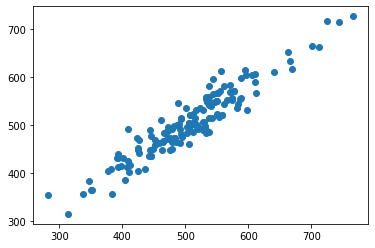

In [24]:
plt.scatter(y_test, result)

In [25]:
def plot_lc(estimator, x, y, train_sizes):
    train_sizes, train_scores, test_scores = learning_curve(estimator, x, y, cv=5, n_jobs=1, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    plt.grid()
    plt.title("Learning Curves")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="g", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="y", label="Cross-validation score")
    plt.legend(loc="best")
    plt.show()

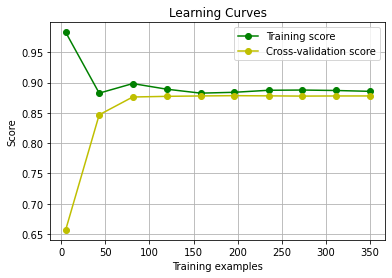

In [26]:
plot_lc(lm,x,y,np.linspace(5, len(x_train), 10, dtype='int'))

# Task 5

Learning curve for the linear regression model shows small gap between training and validation error, meaning that variance should be reduced.  

Print the R2 Score,Variance and MSE. You may use SKLearn.

In [27]:
print("R2 score : %.2f" % r2_score(y_test,result))
print("Mean squared error: %.2f" % mean_squared_error(y_test,result))
v = explained_variance_score(y_test, result)
print ("Variance: %.2f" % v)

R2 score : 0.89
Mean squared error: 734.26
Variance: 0.89


# Task 6

We can obcserve that all though the model is predicting well the variance is high. One way to tackle this is to use additional independent variable and build the model again. So lets consider 'Avg. Session Length' as well to build the new model 'lm1'.

1. Build model lm1 using 'Avg.Session Length', Time on App' and 'Length of Membership'
2. Use this model lm1 and reperform task 4 and task5.
3. Compare the results and share your thoughts on what difference has adding another independent variable has done.

In [28]:
x = customers[['Avg. Session Length', 'Time on App', 'Length of Membership']]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)
lm1 = LinearRegression().fit(x_train, y_train)

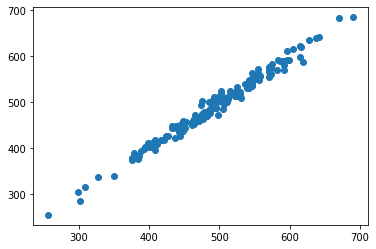

In [29]:
result = lm1.predict(x_test)
plt.scatter(y_test, result)

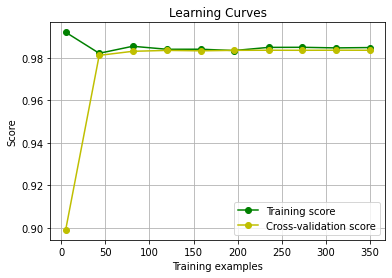

In [30]:
plot_lc(lm1,x,y,np.linspace(5, len(x_train), 10, dtype='int'))

In [31]:
print("R2 score : %.2f" % r2_score(y_test,result))
print("Mean squared error: %.2f" % mean_squared_error(y_test,result))
v = explained_variance_score(y_test, result)
print ("Variance: %.2f" % v)

R2 score : 0.98
Mean squared error: 98.49
Variance: 0.98
